In [13]:
## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josdk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Initial shape: (162980, 2)
After dropping missing values: (162969, 2)


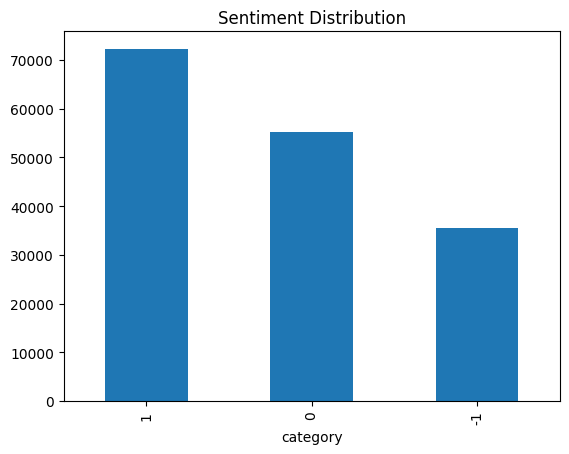

In [7]:
## 2. Load Dataset
df = pd.read_csv("Twitter_Data.csv")
print("Initial shape:", df.shape)
df.dropna(inplace=True)
print("After dropping missing values:", df.shape)
df['category'] = df['category'].astype(int)
df['category'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()


In [8]:
## 3. Preprocessing Function
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['processed_text'] = df['clean_text'].apply(clean_text)

In [9]:
## 4. Text Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_text'])
y = df['category']


In [10]:
## 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
## 6. Model Training
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

              precision    recall  f1-score   support

          -1       0.88      0.78      0.83      7152
           0       0.86      0.97      0.91     11067
           1       0.92      0.89      0.91     14375

    accuracy                           0.89     32594
   macro avg       0.89      0.88      0.88     32594
weighted avg       0.89      0.89      0.89     32594



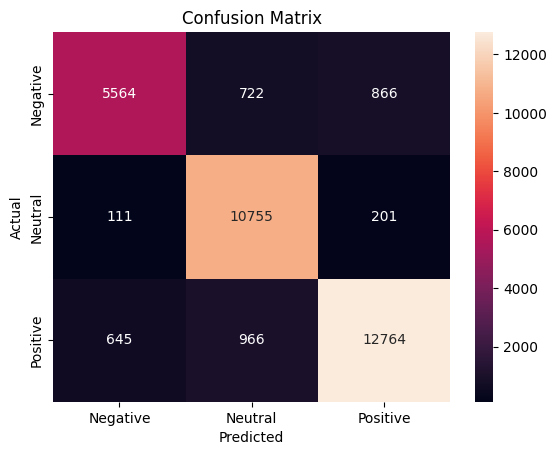

In [12]:
## 7. Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()